In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.providers.ibmq import least_busy

In [59]:
import numpy as np

def quantum_phase_estimation(t, eigenvector, theta=np.pi/4):
    qpe = QuantumCircuit(t + 1, t)

    #Initialize ancilla qubit to eigenvector of the unitary U
    #Currently support only 0 and 1.
    assert(eigenvector == 0 or eigenvector == 1)

    if eigenvector == 1:
        qpe.x(t)

    for i in range(0, t):
        qpe.h(i)
    
    for i in range(0, t):
        for num_rotations in range(0, 2 ** i):
            qpe.cu1(theta, i, t)
        
    return qpe

def qubit_rotations(circuit, n):
    circuit.h(n)
    
    for k in reversed(range(n)):
        circuit.cu1(np.pi/2 ** (n - k), k, n)
    
    return circuit

def qubit_swap(circuit, n):
    for i in range(0, n//2):
        circuit.swap(i, n - i - 1)

def qft(circuit, n):   
    
    for i in reversed(range(n)):
        qubit_rotations(circuit, i)
        
    qubit_swap(circuit, n)
    
    return qft

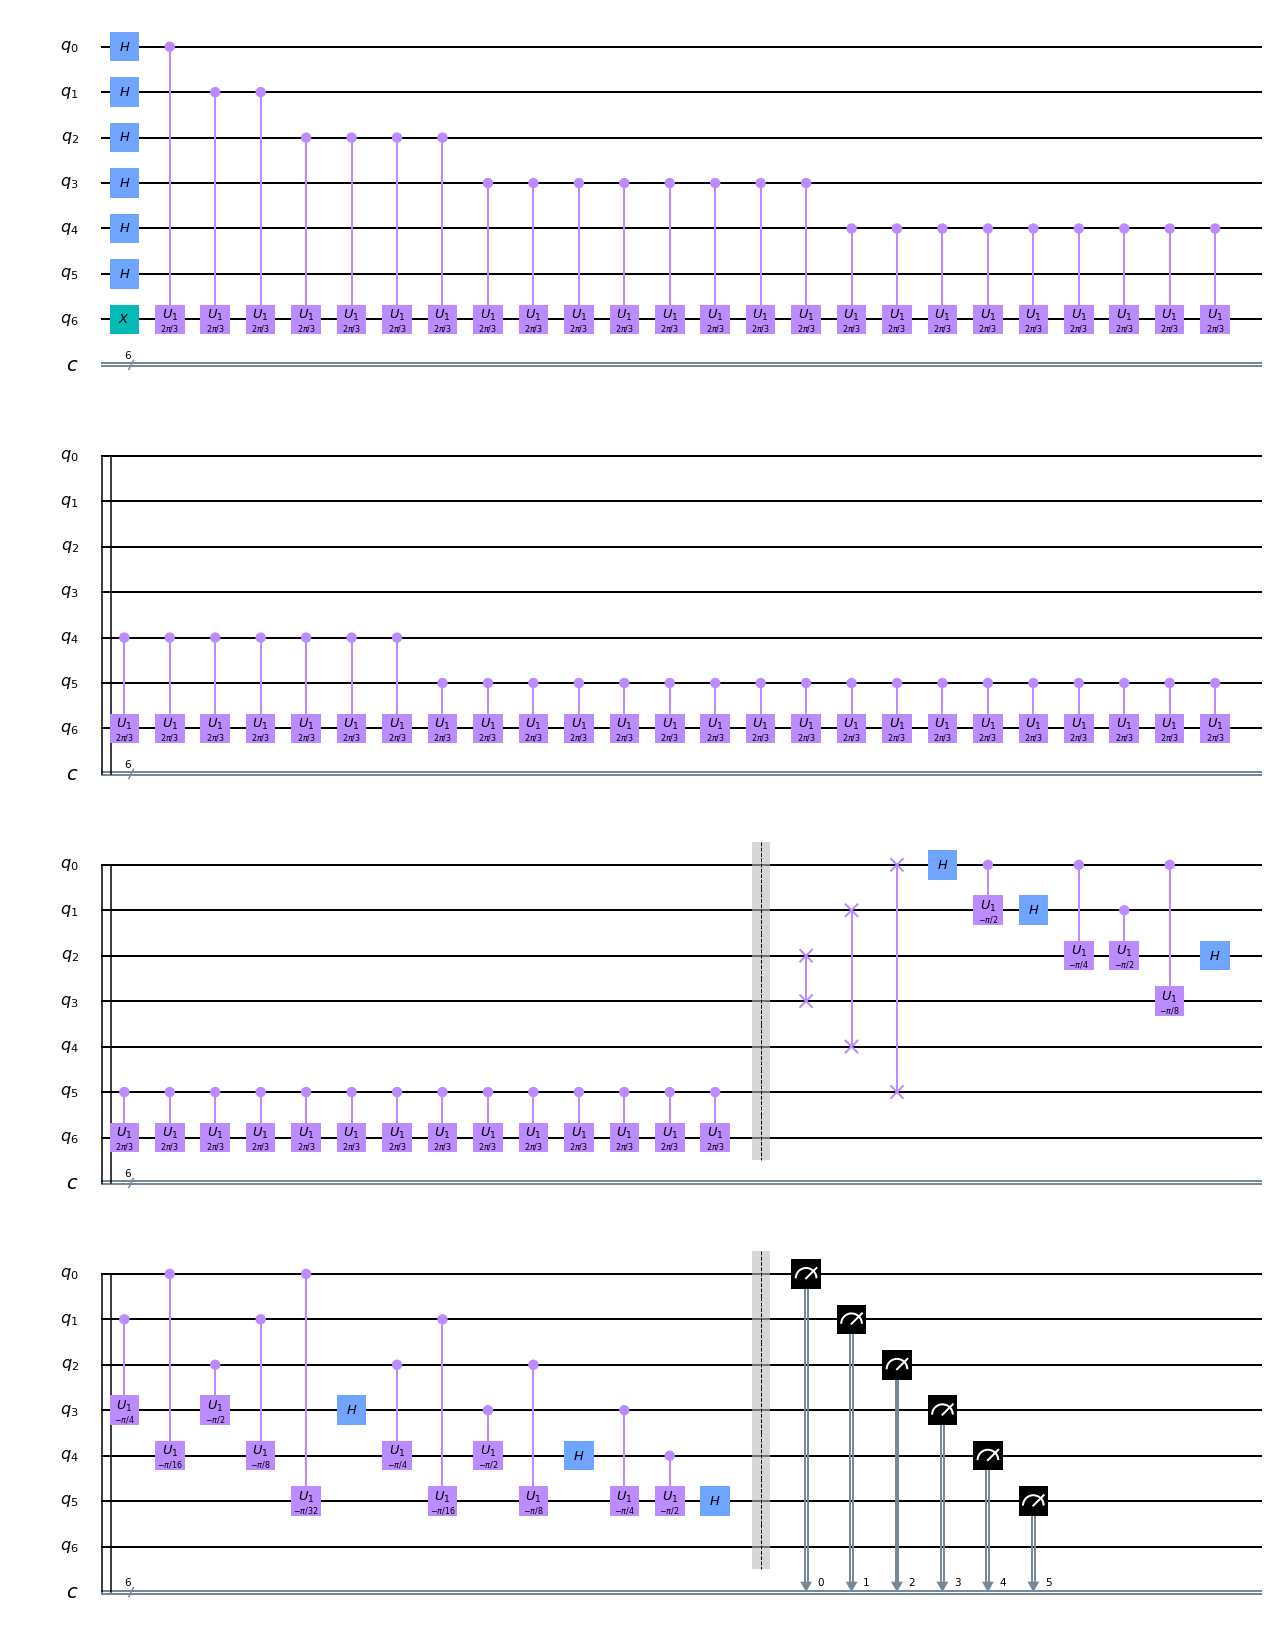

In [86]:
t = 6

qpe = quantum_phase_estimation(t, 1, theta=(np.pi * 2)/3)
qpe.barrier()
qpe.draw(output='mpl')

iqft_circ = QuantumCircuit(t + 1, t)
qft(iqft_circ, t)

iqft_circ = iqft_circ.inverse()

qpe = qpe + iqft_circ
qpe.barrier()

qpe.measure(range(t), range(t))
qpe.draw(output='mpl')

In [83]:
backend = Aer.get_backend('qasm_simulator')

result = execute(qpe, backend=backend, shots=8192).result()

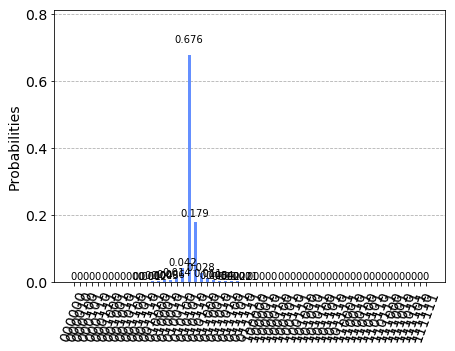

In [84]:
plot_histogram(result.get_counts())